In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.simplefilter("ignore")

In [69]:
def clean_data(df):
    df = df[df.minimum_nights_prev <= 28]
    df['price'] = data.price_prev.apply(lambda p: float(p.replace(",","").replace("$","")))
    df['date'] = pd.to_datetime(df.date)
    df['week_of_year'] = df.date.dt.week
    df['month_of_year'] = df.date.dt.month
    df = df.sort_values("date", ascending=True)
    df = df[df.date <= datetime.datetime(2019,12,31)]
    return df

# Boston vs Chicago

In [58]:
raw_boston = pd.read_csv("processed_data/boston_reservation_date.csv")
raw_chicago = pd.read_csv("processed_data/chicago_reservation_date.csv")

,id,name_prev,host_id_prev,host_name_prev,neighbourhood_group_prev,neighbourhood_prev,latitude_prev,longitude_prev,room_type_prev,number_of_reviews_prev,...,number_of_reviews_post,reviews_per_month_post,calculated_host_listings_count_post,availability_365_post,available_post,price_post,adjusted_price_post,minimum_nights_post,maximum_nights_post,reservation_period
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.365241,-71.029361,Entire home/apt,14,...,14,0.32,1,122,f,$125.00,$125.00,30.0,1125.0,jan_2019_feb_2019
1,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.365241,-71.029361,Entire home/apt,14,...,14,0.32,1,122,f,$150.00,$150.00,30.0,1125.0,jan_2019_feb_2019
2,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.365241,-71.029361,Entire home/apt,14,...,14,0.32,1,122,f,$150.00,$150.00,30.0,1125.0,jan_2019_feb_2019
3,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.365241,-71.029361,Entire home/apt,14,...,14,0.32,1,122,f,$125.00,$125.00,30.0,1125.0,jan_2019_feb_2019
4,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.365241,-71.029361,Entire home/apt,14,...,14,0.32,1,122,f,$125.00,$125.00,30.0,1125.0,jan_2019_feb_2019


In [63]:
boston = clean_data(raw_boston)
chicago = clean_data(raw_chicago)

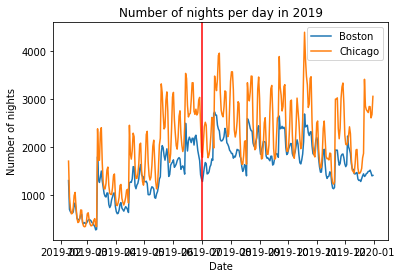

In [90]:
boston_by_day = boston.groupby("date").agg({"price": "mean", "id": "count"})
chicago_by_day = chicago.groupby("date").agg({"price": "mean", "id": "count"})

plt.plot(boston_by_day.index, boston_by_day.id)
plt.plot(chicago_by_day.index, chicago_by_day.id)
plt.axvline(x=datetime.datetime(2019,7,1), c='red')
plt.title("Number of nights per day in 2019")
plt.ylabel("Number of nights")
plt.xlabel("Date")
plt.legend(["Boston", "Chicago"]);

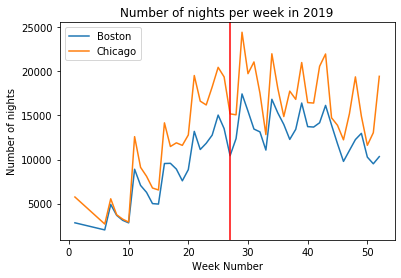

In [92]:
boston_by_week = boston.groupby("week_of_year").agg({"price": "mean", 'id': "count"})
chicago_by_week = chicago.groupby("week_of_year").agg({"price": "mean", 'id': "count"})

plt.plot(boston_by_week.index, boston_by_week.id)
plt.plot(chicago_by_week.index, chicago_by_week.id)
plt.axvline(x=27, c='red')
plt.title("Number of nights per week in 2019")
plt.ylabel("Number of nights")
plt.xlabel("Week Number")
plt.legend(["Boston", "Chicago"]);

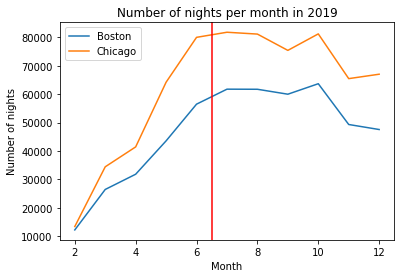

In [94]:
boston_by_month = boston.groupby("month_of_year").agg({"price": "mean", "id": "count"})
chicago_by_month = chicago.groupby("month_of_year").agg({"price": "mean", "id": "count"})

plt.plot(boston_by_month.index, boston_by_month.id)
plt.plot(chicago_by_month.index, chicago_by_month.id)
plt.axvline(x=6.5, c='red')
plt.title("Number of nights per month in 2019")
plt.ylabel("Number of nights")
plt.xlabel("Month")
plt.legend(["Boston", "Chicago"]);

# Comparing to all cities (Boston in Blue)

In [97]:
cities = ["boston", "chicago", "dc", "montreal", "nashville", "ri", "sf"]
cities_dfs = [pd.read_csv("processed_data/"+city+"_reservation_date.csv") for city in cities]
cleaned_dfs = [clean_data(df) for df in cities_dfs]

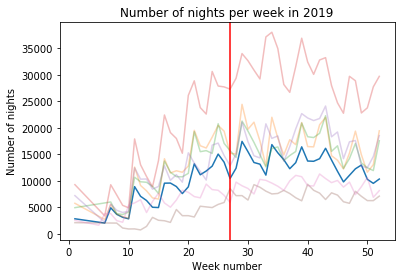

In [98]:
# By week
for city_name, city in zip(cities, cleaned_dfs):
    city_by_week = city.groupby("week_of_year").agg({"price": "mean", "id": "count"})
    if city_name == 'boston':
        plt.plot(city_by_week.index, city_by_week.id, alpha = 1)
    else:
        plt.plot(city_by_week.index, city_by_week.id, alpha = 0.3)
plt.axvline(x=27, c='red')
plt.title("Number of nights per week in 2019")
plt.ylabel("Number of nights")
plt.xlabel("Week number");

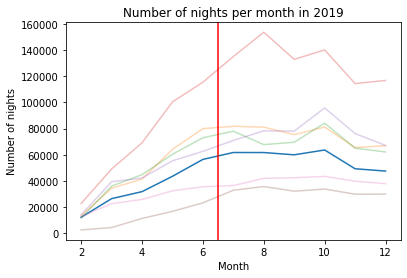

In [99]:
# By month
for city_name, city in zip(cities, cleaned_dfs):
    city_by_month = city.groupby("month_of_year").agg({"price": "mean", "id": "count"})
    if city_name == 'boston':
        plt.plot(city_by_month.index, city_by_month.id, alpha = 1)
    else:
        plt.plot(city_by_month.index, city_by_month.id, alpha = 0.3)
plt.axvline(x=6.5, c='red')
plt.title("Number of nights per month in 2019")
plt.ylabel("Number of nights")
plt.xlabel("Month");